This notebook explores the concepts of low-pass filtering and high-pass filtering.

# Low-pass filtering

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Suppose we obtain a signal that is unfortunately (and unsuprisingly) noisy:

[ 0.04980477 -0.04371366  0.64189904  0.36006821 -0.25882695  0.12901739
  0.50963943  0.36078212 -0.02768893 -0.29555838]


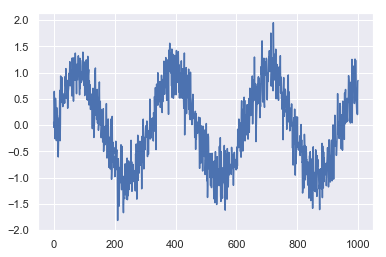

In [32]:
times = np.arange(1000)
signal = 0.3 * np.random.randn(len(times)) + np.sin(0.02 * times)
print(signal[:10])

plt.plot(signal)
plt.show()

Fortunately, we are smart enough to know that the noisy part of the signal can be *filtered* out
using a low-pass filter. 

In [33]:
import scipy.signal

# construct the low-pass filter
low_pass_filter = scipy.signal.butter(3, 0.1)
print("numerator:   %s\ndenominator: %s" % (low_pass_filter[0], low_pass_filter[1]))

numerator:   [0.00289819 0.00869458 0.00869458 0.00289819]
denominator: [ 1.         -2.37409474  1.92935567 -0.53207537]


Curious about what extract is a low pass filter? Turn out for in this function, the return value are the denominator and enumerator of the discrete-time transfer function of the Butterworth low-pass filter. 

Now, let's try to apply this filter to the noisy signal.

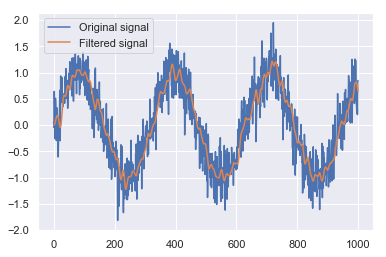

In [34]:
b, a = low_pass_filter
signal_filtered = scipy.signal.lfilter(b, a, signal)

plt.plot(signal, label='Original signal')
plt.plot(signal_filtered, label='Filtered signal')
plt.legend()
plt.show()

And that's it, we have filtered the high-frequency noises component of the original signal. We can
see that the filtered signal is very similar to the original signal, without the noisy part. This
is known as low-pass filter.

# High-pass filtering

TBD